In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mean Square Error Function
def mse(t,prediction):
     return sum((t-prediction)**2)/len(t)

In [3]:
# Loading the data
data = pd.read_csv('TrainData.csv') 
X_train = data[['X']].values
t_train = data[['t']].values
data = pd.read_csv('TestData.csv') 
X_test = data[['X']].values
t_test = data[['t']].values

Test Error: [12.37331766]
Train Error: [11.88504439]


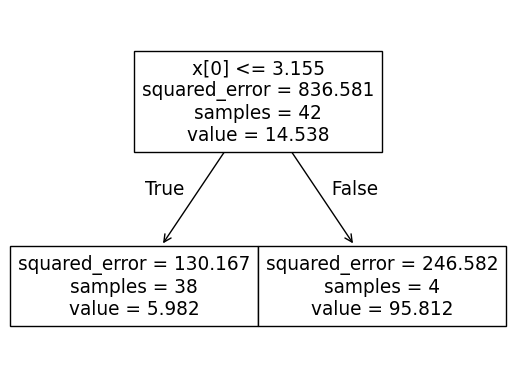

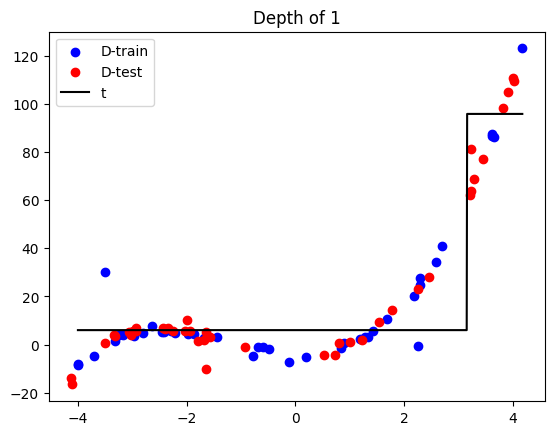

Test Error: [9.89335434]
Train Error: [6.80663349]


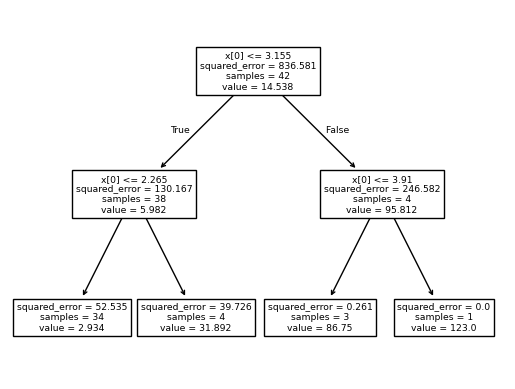

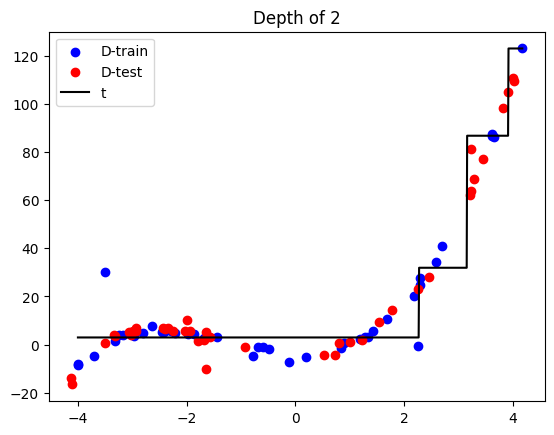

Test Error: [9.35107168]
Train Error: [5.95563561]


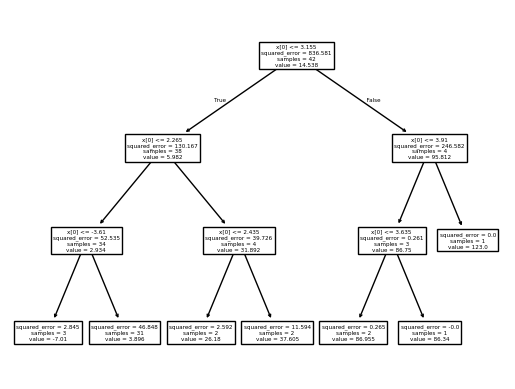

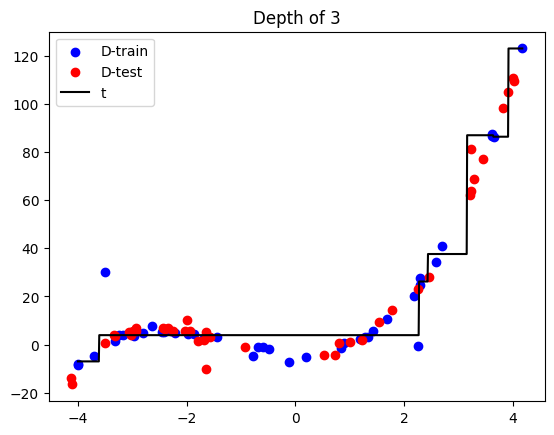

Test Error: [10.3335113]
Train Error: [4.20890303]


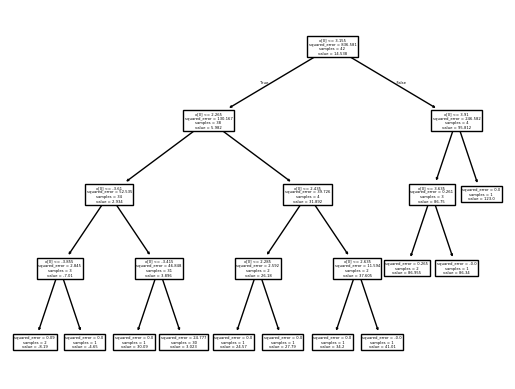

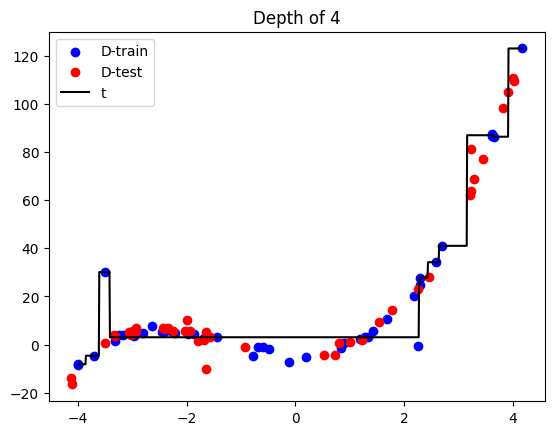

<Figure size 640x480 with 0 Axes>

In [4]:
# Loading the regressor
tree_regressor = DecisionTreeRegressor()

# Trying out different max depth values and plotting the trees
for depth in range(1,5):
    tree_regressor.max_depth = depth
    tree_regressor.fit(X_train, t_train)
    prediction = tree_regressor.predict(X_test)[:,np.newaxis]

    tree.plot_tree(tree_regressor)
    plt.figure()

    print(f'Test Error: {np.sqrt(mse(t_test, prediction))}')
    train_prediction = prediction = tree_regressor.predict(X_train)[:,np.newaxis]
    print(f'Train Error: {np.sqrt(mse(t_train, train_prediction))}')

    plt.scatter(X_train, t_train, color = 'blue', label = 'D-train')
    plt.scatter(X_test, t_test, color = 'red', label = 'D-test')
    X_grid = np.linspace(-4,4.17,1000)
    t_grid = tree_regressor.predict(X_grid.reshape(-1,1))
    plt.plot(X_grid, t_grid, color = 'black', label = 't')
    plt.legend()
    plt.title(f'Depth of {depth}')
    plt.show()
    plt.figure()

Test Error: [12.37331766]
Train Error: [11.88504439]


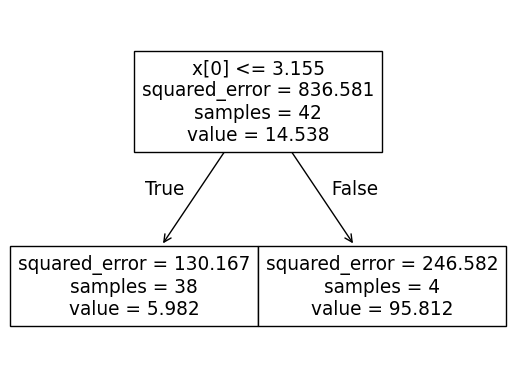

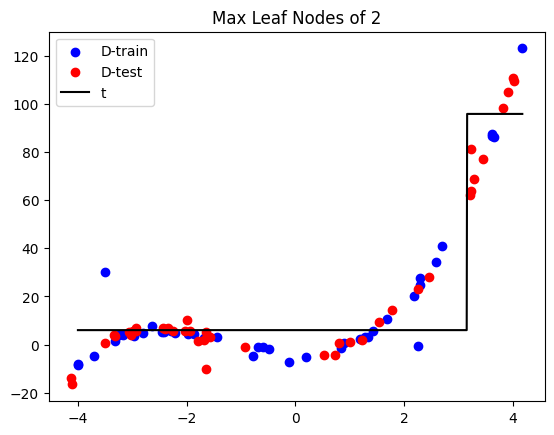

Test Error: [11.63141705]
Train Error: [8.35437977]


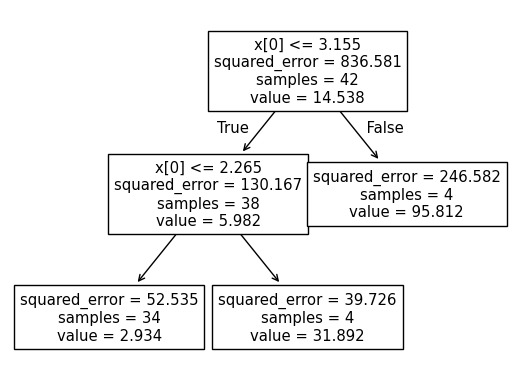

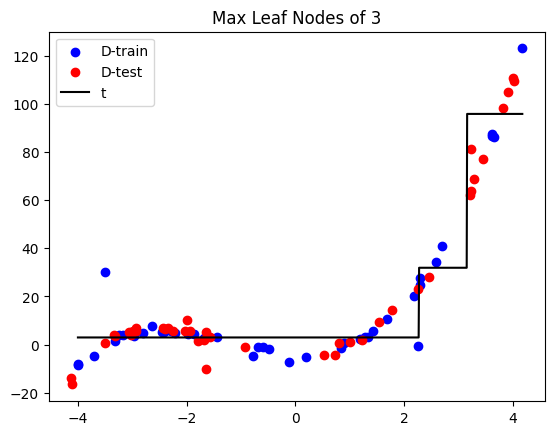

Test Error: [9.89335434]
Train Error: [6.80663349]


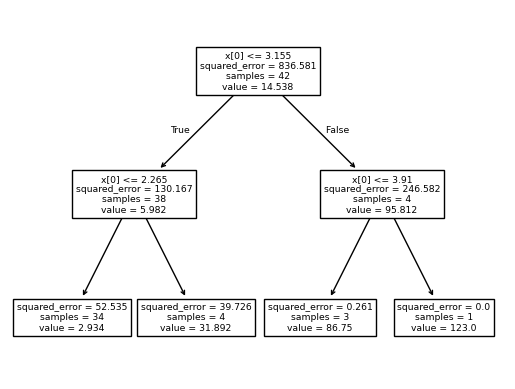

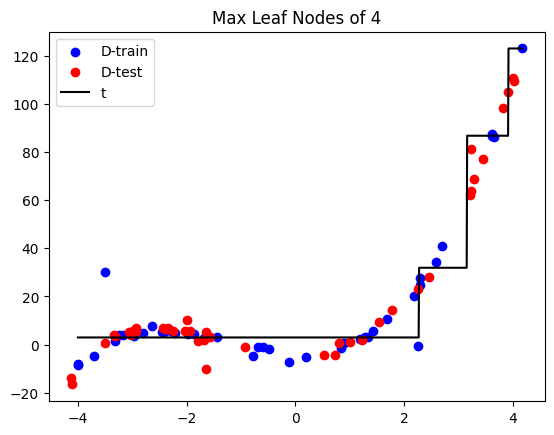

Test Error: [9.17937608]
Train Error: [6.21155947]


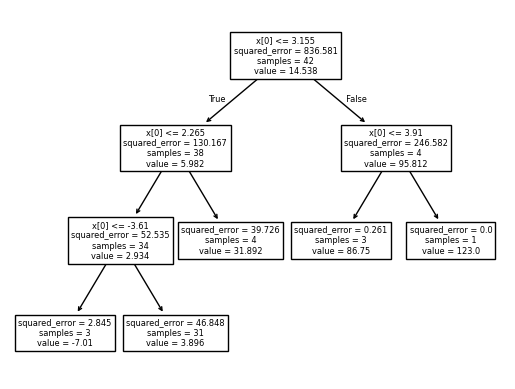

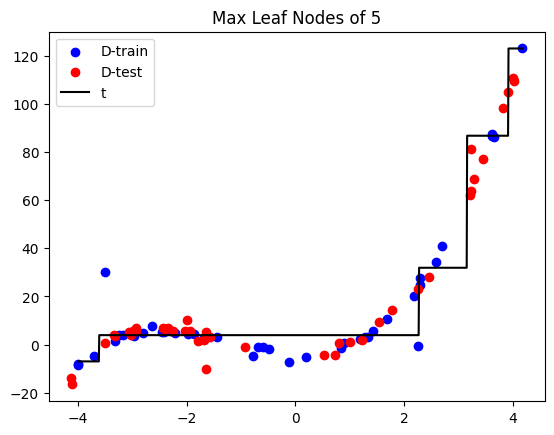

Test Error: [10.28152299]
Train Error: [4.65866766]


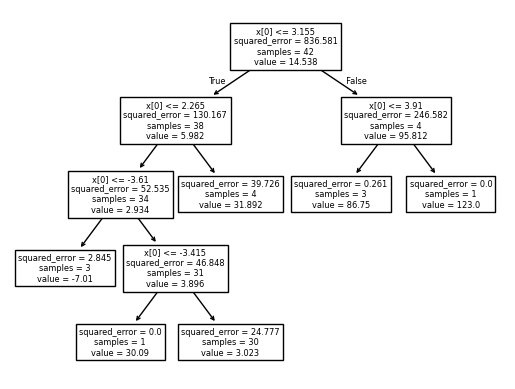

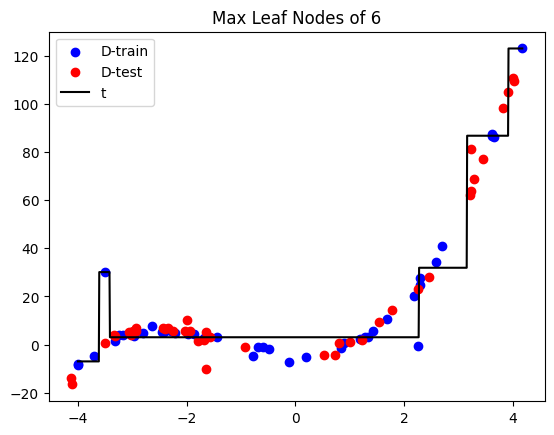

<Figure size 640x480 with 0 Axes>

In [5]:
# Loading the regressor
tree_regressor = DecisionTreeRegressor()

# Trying out different max leaf values and plotting the trees
for n in range(2,7):
    tree_regressor.max_leaf_nodes = n
    tree_regressor.fit(X_train, t_train)
    prediction = tree_regressor.predict(X_test)[:,np.newaxis]

    tree.plot_tree(tree_regressor)
    plt.figure()

    print(f'Test Error: {np.sqrt(mse(t_test, prediction))}')
    train_prediction = prediction = tree_regressor.predict(X_train)[:,np.newaxis]
    print(f'Train Error: {np.sqrt(mse(t_train, train_prediction))}')

    plt.scatter(X_train, t_train, color = 'blue', label = 'D-train')
    plt.scatter(X_test, t_test, color = 'red', label = 'D-test')
    X_grid = np.linspace(-4,4.17,1000)
    t_grid = tree_regressor.predict(X_grid.reshape(-1,1))
    plt.plot(X_grid, t_grid, color = 'black', label = 't')
    plt.legend()
    plt.title(f'Max Leaf Nodes of {n}')
    plt.show()
    plt.figure()

Depth: 1 Test Error: [11.07693886]
Depth: 2 Test Error: [8.57189336]
Depth: 3 Test Error: [7.9816327]
Depth: 4 Test Error: [7.57759699]
Depth: 5 Test Error: [7.90064273]
Depth: 6 Test Error: [8.02629973]
Depth: 7 Test Error: [8.06625781]
Depth: 8 Test Error: [7.85595399]
Depth: 9 Test Error: [7.98611843]
Depth: 10 Test Error: [8.04322375]
Leaves: 11 Test Error: [11.48738989]
Leaves: 11 Test Error: [10.70137704]
Leaves: 11 Test Error: [8.4324474]
Leaves: 11 Test Error: [7.46698401]
Leaves: 11 Test Error: [7.55877247]
Leaves: 11 Test Error: [7.87797161]
Leaves: 11 Test Error: [7.64006623]
Leaves: 11 Test Error: [8.07660164]
Leaves: 11 Test Error: [7.83024358]
Leaves: 11 Test Error: [7.94160452]
Best Test Error: [8.3394849]
Best Train Error: [4.50569155]


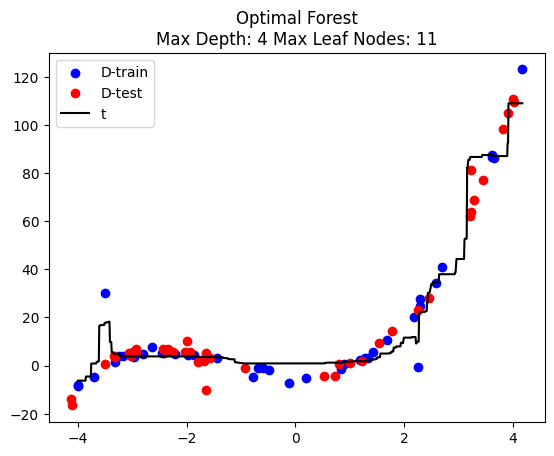

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
# Loading the regressor
forest_regressor = RandomForestRegressor()

max_depth = None
max_leaf_nodes = None

# Finding the optimal depth value
best_err = None
for depth in range (1,11):
    forest_regressor.max_depth = depth
    forest_regressor.fit(X_train, t_train)
    prediction = forest_regressor.predict(X_test)[:,np.newaxis]
    test_err = np.sqrt(mse(t_test, prediction))
    print(f'Depth: {depth} Test Error: {test_err}')
    if best_err == None:
        best_err = test_err
    elif test_err < best_err:
        best_err = test_err
        max_depth = depth

# Finding the optimal max leaf value
best_err = None
for leaves in range(2,12):
    forest_regressor.max_leaf_nodes = leaves
    forest_regressor.fit(X_train, t_train)
    prediction = forest_regressor.predict(X_test)[:,np.newaxis]
    test_err = np.sqrt(mse(t_test, prediction))
    print(f'Leaves: {treeNum} Test Error: {test_err}')
    if best_err == None:
        best_err = test_err
    elif test_err < best_err:
        best_err = test_err
        max_leaf_nodes = treeNum

# Training the regressor using the optimal max depth and max leaf values
forest_regressor.max_depth = max_depth
forest_regressor.max_leaf_nodes = max_leaf_nodes
forest_regressor.fit(X_train, t_train)

# Printing the train and test errors
prediction = forest_regressor.predict(X_test)[:,np.newaxis]
print(f'Best Test Error: {np.sqrt(mse(t_test, prediction))}')
train_prediction = forest_regressor.predict(X_train)[:,np.newaxis]
print(f'Best Train Error: {np.sqrt(mse(t_train, train_prediction))}')

# Plotting the optimal forest
plt.scatter(X_train, t_train, color = 'blue', label = 'D-train')
plt.scatter(X_test, t_test, color = 'red', label = 'D-test')
X_grid = np.linspace(-4,4.17,1000)
t_grid = forest_regressor.predict(X_grid.reshape(-1,1))
plt.plot(X_grid, t_grid, color = 'black', label = 't')
plt.legend()
plt.title(f'Optimal Forest\nMax Depth: {max_depth} Max Leaf Nodes: {max_leaf_nodes}')
plt.show()
plt.figure()